In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Liver_DataFrame = pd.read_csv("indian_liver_patient.csv")
Liver_DataFrame.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
print(Liver_DataFrame.describe())
# print(Liver_DataFrame.info())

              Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  583.000000       583.000000        583.000000            583.000000   
mean    44.746141         3.298799          1.486106            290.576329   
std     16.189833         6.209522          2.808498            242.937989   
min      4.000000         0.400000          0.100000             63.000000   
25%     33.000000         0.800000          0.200000            175.500000   
50%     45.000000         1.000000          0.300000            208.000000   
75%     58.000000         2.600000          1.300000            298.000000   
max     90.000000        75.000000         19.700000           2110.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                583.000000                  583.000000      583.000000   
mean                  80.713551                  109.910806        6.483190   
std                  182.620356                  288.918529 

In [4]:
Liver_DataFrame.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [5]:
Liver_DataFrame.Albumin_and_Globulin_Ratio = Liver_DataFrame.Albumin_and_Globulin_Ratio.fillna(Liver_DataFrame["Albumin_and_Globulin_Ratio"].mean())
Liver_DataFrame.Albumin_and_Globulin_Ratio.isnull().sum()

0

<Axes: >

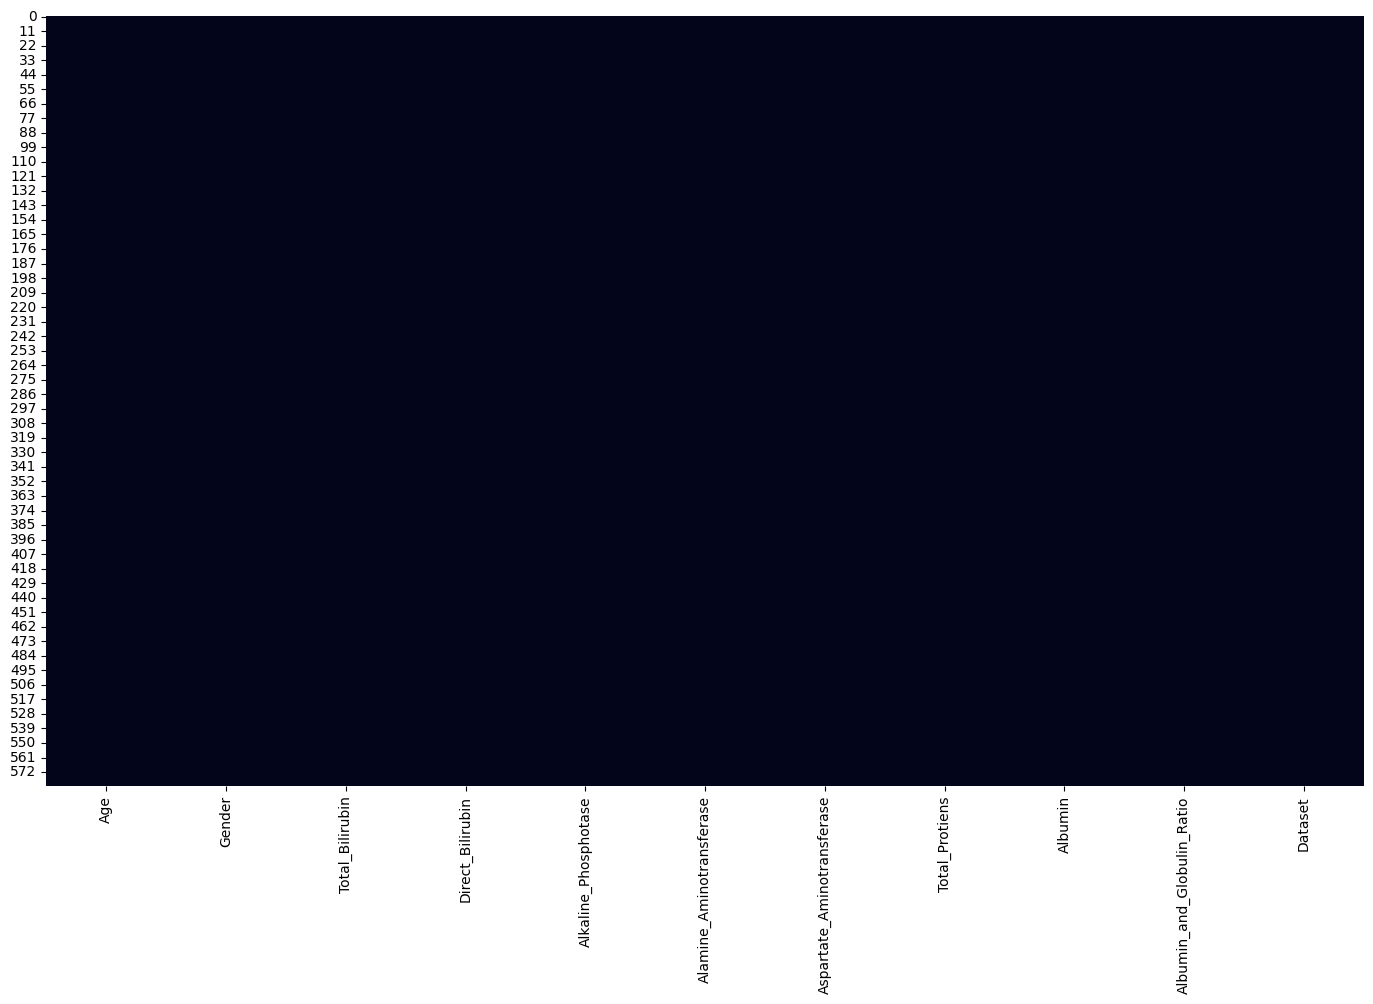

In [6]:
plt.figure(figsize=(17,10))
sns.heatmap(Liver_DataFrame.isnull(),cbar=False)

In [7]:
from sklearn.preprocessing import LabelEncoder
L = LabelEncoder()
Liver_DataFrame["Gender"] = L.fit_transform(Liver_DataFrame["Gender"])
Liver_DataFrame["Gender"].head(15)

0     0
1     1
2     1
3     1
4     1
5     1
6     0
7     0
8     1
9     1
10    1
11    1
12    1
13    0
14    1
Name: Gender, dtype: int32

In [8]:
Liver_DataFrame["Age"].quantile(0.95)

72.0

Age                           -13.735063
Gender                         -8.241591
Total_Bilirubin               -22.020756
Direct_Bilirubin              -24.604634
Alkaline_Phosphotase          -18.486561
Alamine_Aminotransferase      -16.341616
Aspartate_Aminotransferase    -15.193375
Total_Protiens                  3.500824
Albumin                        16.138782
Albumin_and_Globulin_Ratio     16.231913
Dataset                       100.000000
Name: Dataset, dtype: float64


<Axes: >

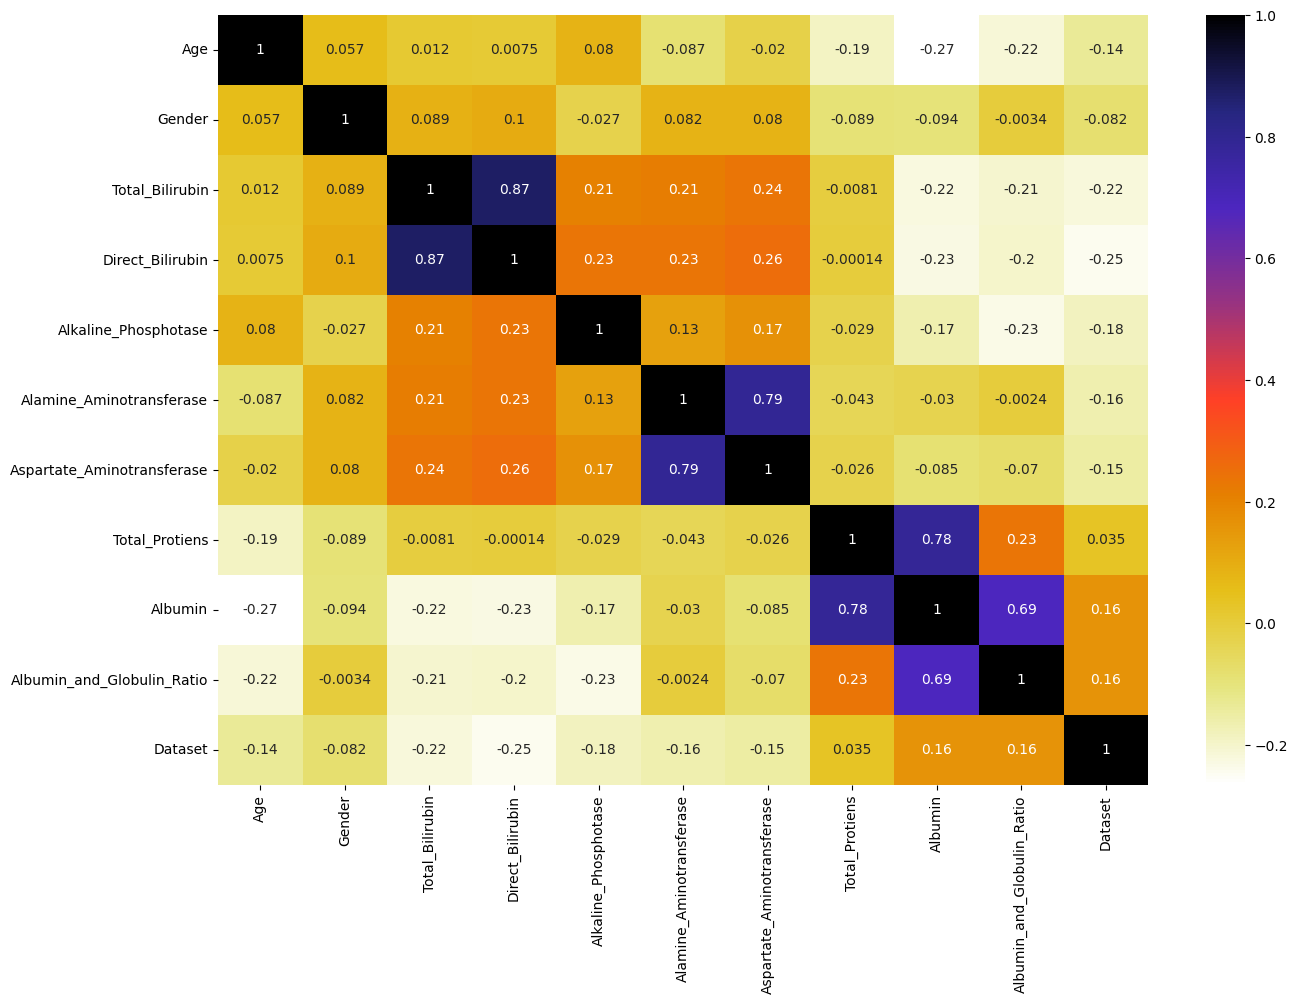

In [9]:
corr_matrix = Liver_DataFrame.corr()
print(corr_matrix["Dataset"]*100)
# let's plot corelation in heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.CMRmap_r)

In [10]:
# columns = Liver_DataFrame.columns
# Indexes = []
# for a in columns:
#     per_95, per_05 = Liver_DataFrame[a].quantile(0.95), Liver_DataFrame[a].quantile(0.05)
#     iqr = per_95 - per_05
#     upperLimit, lowerLimit = per_95 + 1.5 * iqr, per_05 - 1.5 * iqr
    
#     i = Liver_DataFrame.loc[(Liver_DataFrame[a]>upperLimit) | (Liver_DataFrame[a]<lowerLimit)].index
#     for ele in i:
#         if ele not in Indexes:
#             Indexes.append(ele)

In [11]:
# df_clean = Liver_DataFrame.drop(index=Indexes)
# df_clean.shape

In [12]:
X=Liver_DataFrame.drop(["Dataset","Total_Bilirubin","Alamine_Aminotransferase","Total_Protiens"], axis=1)
y=Liver_DataFrame["Dataset"]
X
y

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 583, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)
print(len(X_train),len(X_test))

466 117


In [14]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
from sklearn import tree
param_dist ={
    "criterion":['gini', 'entropy', 'log_loss'],
    "max_depth":[1,2,3,4,5,6,None],
    "max_features": ['auto', 'sqrt', 'log2'],
    "splitter":['best', 'random']
}

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, param_grid=param_dist, cv=10, n_jobs=-1)
grid.fit(X_train,y_train)



C:\Users\babun\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
420 fits failed out of a total of 1260.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\babun\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\babun\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\babun\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 637, in _validate_params
    val

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [16]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [17]:
grid.best_score_

0.7339500462534689

In [44]:
from sklearn import tree
mdl = tree.DecisionTreeClassifier(criterion="gini",max_depth=3,max_features="sqrt",splitter="best")
mdl.fit(X_train,y_train)
mdl.score(X_test,y_test)*100 # after tuning 71

70.94017094017094

In [20]:
mdl.predict([[65,45,0,187,18,3.3,0.90]])

C:\Users\babun\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [47]:
from sklearn import tree
m = tree.DecisionTreeClassifier()
m.fit(X_train,y_train)
m.score(X_test,y_test)*100 # before 64.10

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.